In [1]:
import numpy as np

#  We know backprogagation for scalar values
#### What about vectors and matrices? we need them because everything is matrices/vectors.
Linear classification:
f(xi,W,b)=W*xi*b 
where:W=weights, xi= x input (images), b=bias
our output is a vector containing all probabilites of each class, so lets call it ~y.

note: "~y" means y as a vector

~y = W ~xi.
We have a loss function that in the end of the forward pass calculates our loss. Then, we run that loss backwards in our graph (DAG). In order to know where is this loss/error coming from, we need to know the derivatives for each component(value) in the W matrix, and then, optimize it using this derivatives/gradients.

## Matrix/Vector partial derivative
we are interested in the derivative of ~y with respect to ~xi(i.e. how each element of the vector xi is impacting in the final loss on our probabilities vector y). lets do the 3rd component of ~y with respect to the 7th component 
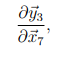
which is just the derivative of one scalar with respect to another.

From the definition of matrix-vector multiplication, the value ~y3 is computed by
taking **the dot product between the 3rd row of W and the vector ~x**:
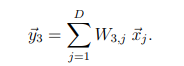
At this point, we have reduced the original matrix equation (Equation 1) to a scalar equation.
This makes it much easier to compute the desired derivatives.

#### Removing summation notation:
The expression above can be represented as:
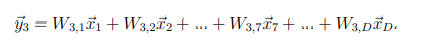

Now since we want to take the partial derivative with respect to 7th component(~x7), the function above will be explictly refering to this component.
At this point, we can see that the expression for y3 only depends
upon ~x7 through a single term, W3,7 ~x7. Since none of the other terms in the summation
include ~x7, their derivatives with respect to ~x7 are all 0. Thus, we have:
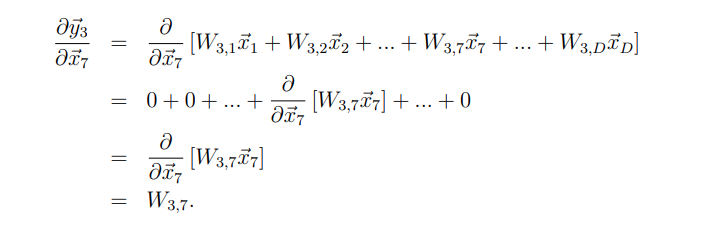
Note that with that in mind, the partial derivative for this operation, is actually just the element from W matrix.
important thing is:
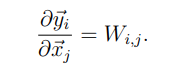


In [9]:
from rich import print
W = np.random.randn(5, 10) #weights 
X = np.random.randn(10, 3)
# W is shape 5,10, X is shape 10,3 so we can multiply the matrices by matrix algebra definition.
# And output will be 5,3 matrix
D = W.dot(X)

# now suppose we had the gradient on D from above in the circuit
dD = np.random.randn(*D.shape) # same shape as D

#  For example, X is of size [10 x 3] and dD of size [5 x 3], because it must be same size as D, so if we want dW and W has shape 
# [5 x 10], and dW must be same shape, we need a matrix multiplication kind of: 
# dD(shape 5,3)* matrix(shape something,10) = dW(5,10)
# in order to get that matrix something,10, we transpose the input that was shape 10,3 into 3,10.
# then the only way of achieving this is with dD.dot(X.T), as shown below.
dW = dD.dot(X.T) #.T gives the transpose of the matrix

# just the same but now we have to transpose W
dX = W.T.dot(dD) # and of course dX should be shaped as X

from pandas import *
print("W matrix:")
print(DataFrame(W))

print("Xi input")
print(DataFrame(X))

print("Dot product of W and Xi:")
print(DataFrame(D))

print("Imaginary gradient coming on D backwards:")
print(DataFrame(dD))

print("dW:")
print(DataFrame(dW))

print("dX:")
print(DataFrame(dX))